In [1]:
import pandas as pd

DATA = '/kaggle/input/gamestop-historical-stock-prices/GME_stock.csv'
df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['date'])
df['year'] = df['date'].dt.year
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price,year
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006,2021
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010,2021
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996,2021
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,2021
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,2021


How many years of quotes do we have?

<Axes: xlabel='year', ylabel='Count'>

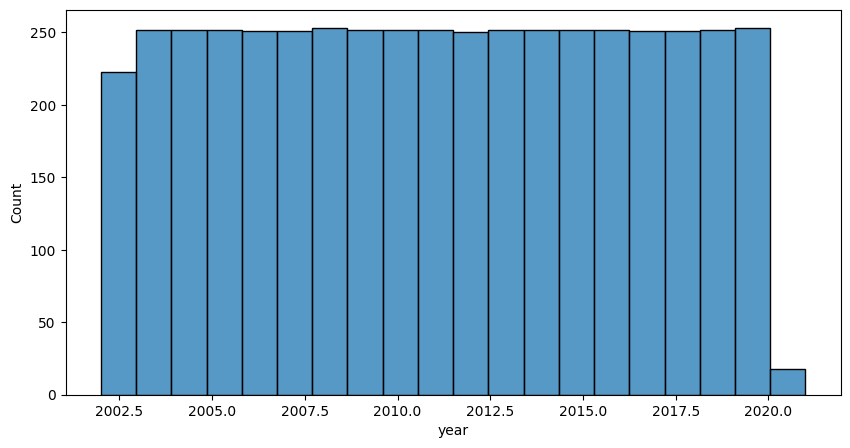

In [2]:
import matplotlib.pyplot as plt

from seaborn import histplot
from warnings import filterwarnings

filterwarnings(action='ignore', category=FutureWarning)

plt.figure(figsize=(10, 5))
histplot(data=df, x='year', bins=20)

We have about 19 years of quotes, and most of our years are complete.

Let's start by looking at the price correlations.

In [3]:
df[['open_price', 'high_price', 'low_price', 'close_price', 'adjclose_price']].corr()

,open_price,high_price,low_price,close_price,adjclose_price
open_price,1.000000,0.979230,0.983531,0.994380,0.973626
high_price,0.979230,1.000000,0.933568,0.964880,0.964430
low_price,0.983531,0.933568,1.000000,0.989899,0.945227
close_price,0.994380,0.964880,0.989899,1.000000,0.976725
adjclose_price,0.973626,0.964430,0.945227,0.976725,1.000000


The fact that none of the correlations are perfect tells us that there have been some dividends and/or splits, and none of our data is optional.

Let's make a time series of the adjusted close prices. 

<Axes: xlabel='date', ylabel='adjclose_price'>

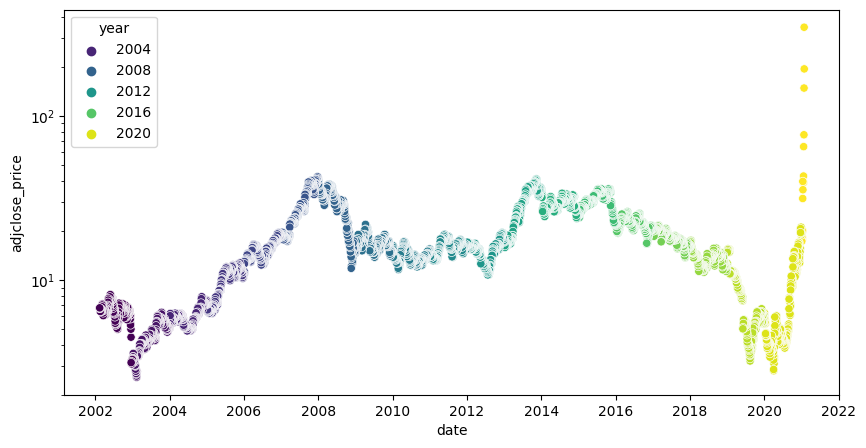

In [4]:
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='date', y='adjclose_price', hue='year', palette='viridis')

There's so much price volatility in the last two calendar years we need to use a lot plot in the price direction.

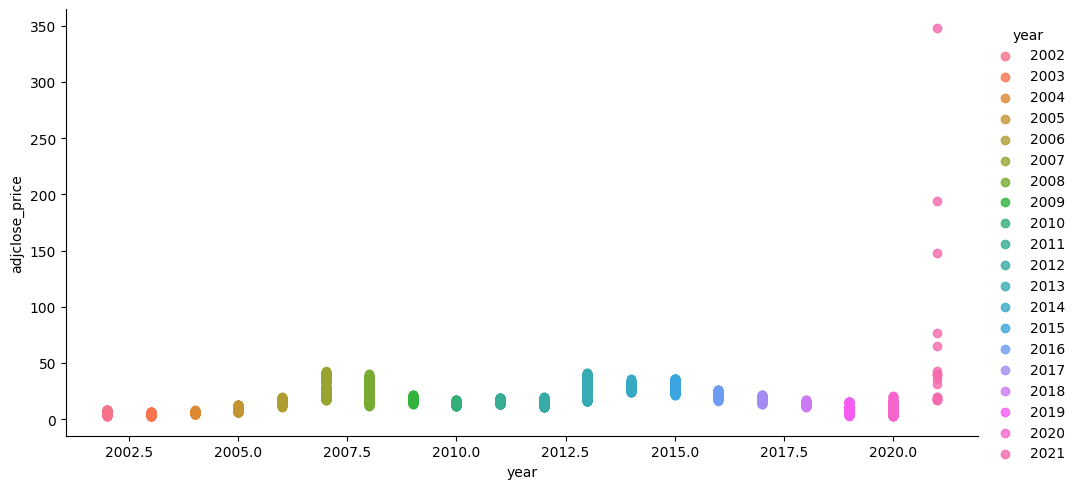

In [5]:
from seaborn import lmplot

lmplot(data=df, x='year', y='adjclose_price', aspect=2, hue='year')

This really is shocking; the price looks like it stays in a relatively small trading range until 2021.

Let's look at the price as a function of the volume. We know from open sources that a lot of the recent price volatility is a function of short squeezes, which might 

<Axes: xlabel='volume', ylabel='adjclose_price'>

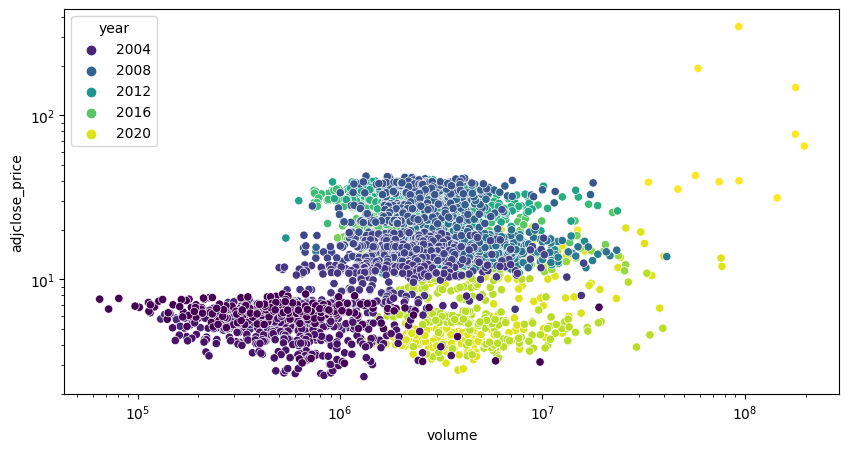

In [6]:
plt.figure(figsize=(10, 5))

plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df, x='volume', y='adjclose_price', hue='year', palette='viridis')

What do we see? We see a lot of price retrenchment as over most of the period of interest the prices stay in a relatively narrow trading range, followed by some anomalous looking prices and volatilities in 2021.

<Axes: xlabel='adjclose_price', ylabel='volume'>

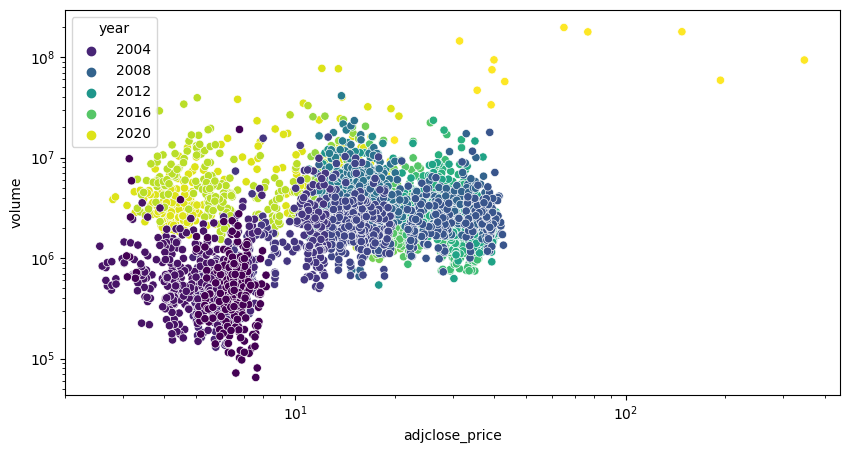

In [7]:
plt.figure(figsize=(10, 5))

plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df, y='volume', x='adjclose_price', hue='year', palette='viridis')

If we look at the volatility as a function of the price we see essentially the same thing: most of the time prices and volatilities are normal, and then in 2021 they both become abnormal.